# Pendiente por repasar

* Repasar contenido de este JN
* Repasar contenido del curso
* mAP@X
* Por que realmente funciona resnet?
* Por que se dice que un bloque 1x1 es como una network in network? (neurona)
* MobileNet : separable convolutions para menor costo computacional
* Entender realmente area under curve
* deteccion por sliding windows y su solucion con convolucionales
* Comparacion de yolov4,yolov5 ... yolo v10-11
* revisar mas a fondo la seccion de anchors, se eligen a mano para el GT?
* Revisar todo el contenido de la ficha tecnica
* Repasar contenido del curso (mobileNET y efficientNET)
* que es ultralytics
* ocr: optical character recognition. Generacion de texto digital a partir de imagenes, actualmente se implementan autoencoders y variational autoencoders
* SOTA: state of art

# mAP@X

* Precision : para una clase, TP/TP+FP, de todo lo que predijiste como positivo, cuanto acertaste
* Recall: para una clase, TP/TP+FN, de todos los positivos que tuviste que haber predicho, predijiste tanto
* Curva Precision-Recall, precision y recall para diferentes umbrales DE CONFIANZA
* Alta precision y bajo recall -> El modelo es muy cuidadoso, se le escapan muchos verdaderos positivos
* Baja precision y alto recall -> El modelo es muy agresivo, introduce muchos falsos positivos
* El mAP es el promedio de Average Precision (lo mismo que Area under PR curve), basicamente es el promedio de la capacidad del modelo de mantener la precision para mas GT. Mientras el mAP es mayor quiere decir que, en promedio, el modelo es mejor para predecir las clases mientras mas clases hay. 


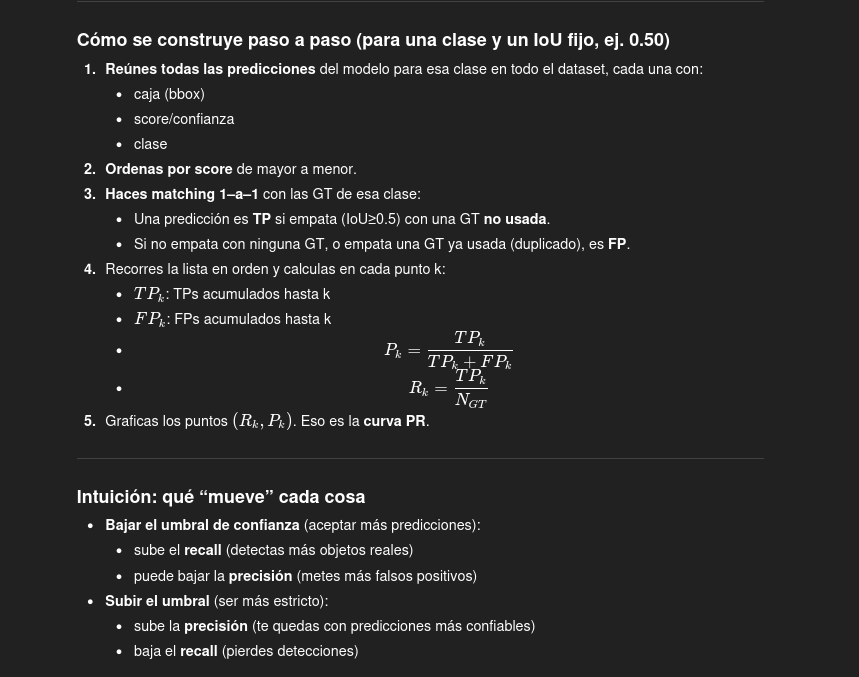

# VLM

* visual language model
* son autoencoders que combinan texto + imagenes
* tienen una capa de razonamiento mayor

# EfficientAD

* Modelo de aprendizaje no supervisado
* Utilizado para deteccion de anomalias en imagenes
* Se entrenan dos modelos : teacher y student
* El teacher solo se entrena con todos los modelos el student solo con los normales
* En inferencia, se compara el resultado hecho por el teacher contra el hecho por el student, el student no sera capaz de reconstruir las imagenes anomalas entonces la diferencia con lo hecho por el teacher sera grande

# NMS

* Para todos los bounding boxes predichos
* Elimina los que tengan un pc menor a cierto umbral
* Luego para cada clase, te quedas con el que tiene mas IoU

# Otros algoritmos para deteccion de objetos (alternativas a YOLO)

Cuando son mejores que YOLO?
* **R-CNN (2014)**
  Pipeline “por etapas”:

  1. Genera ~2k *region proposals* con **Selective Search** (método externo) usando un modelo de segmentacion.
  2. **Recorta** cada región, la **redimensiona** y la pasa por una CNN para extraer features.
  3. Clasifica con SVM y ajusta cajas con regresión.
     **Problema:** lentísimo (miles de forward passes por imagen) y entrenamiento poco unificado.

* **Fast R-CNN (2015)**
  Hace **un solo forward** de la CNN sobre la imagen completa → obtiene un **feature map**.
  Luego, para cada proposal (aún de Selective Search), usa **ROI Pooling** para extraer un vector fijo y desde ahí:

  * **clasificación** (softmax)
  * **regresión de bounding box**
    **Mejora:** mucho más rápido y entrenamiento end-to-end (en gran parte), pero sigue dependiendo de proposals externos (cuello de botella).

* **Faster R-CNN (2015)**
  Reemplaza Selective Search por una red: **RPN (Region Proposal Network)** que propone cajas usando **anchors** directamente desde el feature map.
  Pipeline: backbone CNN compartido → **RPN** genera proposals → **ROI Pooling/Align** → head de clasificación + regresión.
  **Resultado:** mucho más rápido que Fast R-CNN (porque proposals son “learned”) y suele dar excelente precisión/recall


# AUC-ROC vs AUC-PR vs F1

## F1-score

1. **Forma práctica de interpretar su valor**

* “Qué tan bien balancea el modelo **precision** y **recall** en un **umbral específico**.”
* Si F1 sube, normalmente significa que logras **capturar más positivos sin ensuciar demasiado** (o que limpias FP sin perder demasiados TP).
* Castiga fuerte si una de las dos (precision/recall) es baja.

2. **Rango de valores**

* **0 a 1**.
* 1 = perfecto (precision=1 y recall=1).
* 0 = no estás capturando positivos (TP=0) o precision/recall = 0.

3. **Cuándo se utiliza**

* Cuando necesitas **un único número operativo** para un **umbral concreto**.
* Cuando FP y FN tienen importancia “similar” (o al menos quieres un balance).
* Muy usado en **detección**/clasificación donde “positivo” es lo importante y no quieres optimizar solo precision o solo recall.

4. **Cómo se calcula**

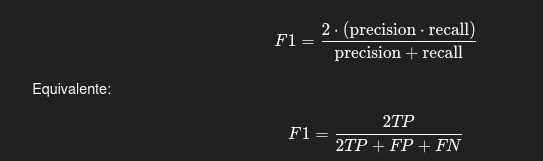

## AU-ROC (Área bajo la curva ROC)

1. **Forma práctica de interpretar su valor**

* “Qué tan bien el modelo **ordena** positivos por encima de negativos” (capacidad de discriminación global).
* Interpretación muy útil: **probabilidad** de que un positivo aleatorio tenga score mayor que un negativo aleatorio.
* 0.5 ≈ ranking tipo azar; cerca de 1 ⇒ ranking casi perfecto.

2. **Rango de valores**

* **0 a 1** (en práctica: normalmente **0.5 a 1** si el modelo no está invertido).
* 0.5 = aleatorio; 1 = perfecto.

3. **Cuándo se utiliza**

* Cuando quieres evaluar **discriminación sin fijar umbral** (calidad del ranking).
* Cuando el desbalance no es extremo, o cuando te interesa el ranking global aunque haya desbalance.
* Útil para comparar modelos cuando el costo operativo del umbral aún no está definido.

4. **Cómo se calcula**

* Construyes la **ROC curve** variando el umbral y calculando puntos:

  * **TPR = Recall** (eje Y)
  * **FPR** (eje X)
* El **AU-ROC** es el **área bajo la curva** (integral; en práctica aproximación por trapecios).

---

## AU-PR (Área bajo la curva Precision–Recall) / Average Precision

1. **Forma práctica de interpretar su valor**

* “Qué tan bien mantiene el modelo **precision alta** mientras aumenta **recall** al variar el umbral.”
* Es la métrica que más “te grita” cuando hay **muchos falsos positivos** en problemas con positivos raros.
* La referencia mental: compara contra el **baseline = prevalencia** de positivos.

2. **Rango de valores**

* **0 a 1**.
* La “línea base” no es 0.5: suele ser aproximadamente **P/(P+N)** (prevalencia).

  * Ej: si 1% son positivos, un modelo flojo puede estar cerca de **0.01**.

3. **Cuándo se utiliza**

* Cuando la clase positiva es **rara** (desbalance fuerte).
* Cuando importa mucho que “si digo positivo, sea verdad” (control de FP) sin sacrificar demasiado recall.
* En ranking/retrieval, detección de fraude, medicina, anomalías, etc.

4. **Cómo se calcula**

* Construyes la **PR curve** variando umbrales y calculando puntos:

  * **Recall** (eje X)
  * **Precision** (eje Y)
* El **AU-PR** es el área bajo esa curva.

  * En muchas implementaciones se reporta como **Average Precision (AP)**, que aproxima el área ponderando precisión por incrementos de recall.
